In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv(os.getcwd() + '/Data/Fremont_Bridge_Bicycle_Counter.csv', index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [3]:
data.shape

(137798, 3)

Preprocessing:

In [4]:
data.rename(columns = {'Fremont Bridge Total': 'Total', 'Fremont Bridge East Sidewalk': 'East', 'Fremont Bridge West Sidewalk': 'West'}, inplace = True)

In [5]:
df = data.reset_index()

# keep data from 2017-11-01, remove duplicate rows
df = df[df['Date'] >= pd.to_datetime('2017-11-01')].sort_values(by = 'Date').set_index('Date')
df = df[~(df.index.duplicated())]

df.head()

,Total,East,West
Date,,,
2017-11-01 00:00:00,6.0,1.0,5.0
2017-11-01 01:00:00,14.0,6.0,8.0
2017-11-01 02:00:00,3.0,0.0,3.0
2017-11-01 03:00:00,3.0,0.0,3.0
2017-11-01 04:00:00,10.0,4.0,6.0


In [6]:
df.shape

(27024, 3)

In [7]:
df.dropna().describe()

,Total,East,West
count,27021.000000,27021.000000,27021.000000
mean,113.951519,45.376374,68.575145
std,147.689790,56.489833,97.589241
min,0.000000,0.000000,0.000000
25%,12.000000,5.000000,7.000000
50%,60.000000,26.000000,34.000000
75%,151.000000,64.000000,86.000000
max,1097.000000,541.000000,850.000000


In [8]:
all_resample = df.resample('A')  # A is year end

In [9]:
all_resample.sum()

,Total,East,West
Date,,,
2017-12-31,103546.0,42388.0,61158.0
2018-12-31,1051880.0,425655.0,626225.0
2019-12-31,1187146.0,449854.0,737292.0
2020-12-31,736512.0,308218.0,428294.0


In [10]:
all_resample.mean()

,Total,East,West
Date,,,
2017-12-31,70.728142,28.953552,41.774590
2018-12-31,120.091335,48.596301,71.495034
2019-12-31,135.534422,51.359059,84.175362
2020-12-31,91.617365,38.340341,53.277025


In [11]:
all_resample.median()

,Total,East,West
Date,,,
2017-12-31,33.0,15.0,18.0
2018-12-31,65.0,28.0,35.0
2019-12-31,69.0,29.0,40.0
2020-12-31,54.0,22.0,32.0


In [12]:
all_resample.ohlc()

Total                     East                    West              \
            open    high  low close  open   high  low close  open   high  low   
Date                                                                            
2017-12-31   6.0   566.0  0.0  16.0   1.0  276.0  0.0   7.0   5.0  453.0  0.0   
2018-12-31  28.0   924.0  0.0  13.0  14.0  521.0  0.0   7.0  14.0  709.0  0.0   
2019-12-31   9.0  1097.0  0.0  16.0   0.0  541.0  0.0   7.0   9.0  850.0  0.0   
2020-12-31  11.0   730.0  0.0   5.0   4.0  381.0  0.0   0.0   7.0  572.0  0.0   

                  
           close  
Date              
2017-12-31   9.0  
2018-12-31   6.0  
2019-12-31   9.0  
2020-12-31   5.0

Note: Our subset of data for 2017 starts on 2017-11-01, and 2020 ends on 2020-11-30

Resample data:

In [13]:
weekly = df.resample('W').sum()  # get weekly sum of data
weekly.head()

,Total,East,West
Date,,,
2017-11-05,9306.0,3812.0,5494.0
2017-11-12,15333.0,6199.0,9134.0
2017-11-19,14273.0,5793.0,8480.0
2017-11-26,8150.0,3442.0,4708.0
2017-12-03,14023.0,5668.0,8355.0


Plot data, seasons, and COVID-19 stay-at-home order:

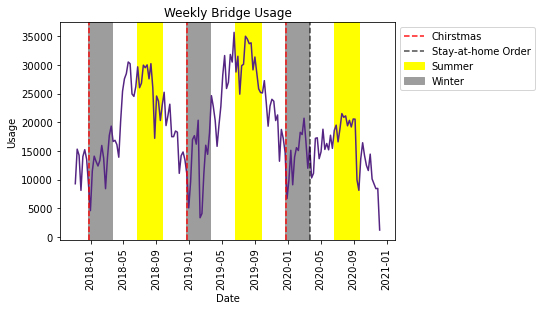

In [14]:
plt.plot(weekly.index, weekly['Total'], color = '#552583')
plt.axvspan(pd.to_datetime('2017-12-21'), pd.to_datetime('2018-03-20'), color = '#9d9d9d')
plt.axvspan(pd.to_datetime('2018-06-21'), pd.to_datetime('2018-09-22'), color = '#ffff00')
plt.axvspan(pd.to_datetime('2018-12-21'), pd.to_datetime('2019-03-20'), color = '#9d9d9d')
plt.axvspan(pd.to_datetime('2019-06-21'), pd.to_datetime('2019-09-23'), color = '#ffff00', label = 'Summer')
plt.axvspan(pd.to_datetime('2019-12-21'), pd.to_datetime('2020-03-19'), color = '#9d9d9d', label = 'Winter')
plt.axvspan(pd.to_datetime('2020-06-20'), pd.to_datetime('2020-09-22'), color = '#ffff00')
plt.axvline(pd.to_datetime('2017-12-25'), ls = '--', color = '#ff0000', alpha = 0.9)
plt.axvline(pd.to_datetime('2018-12-25'), ls = '--', color = '#ff0000', alpha = 0.9)
plt.axvline(pd.to_datetime('2019-12-25'), ls = '--', color = '#ff0000', alpha = 0.9, label = 'Chirstmas')
plt.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#000000', alpha = 0.7, label = 'Stay-at-home Order')  # https://www.seattletimes.com/seattle-news/inslee-to-hold-televised-address-monday-evening-to-announce-enhanced-strategies-on-covid-19/
plt.title('Weekly Bridge Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()

In [15]:
weekly_sub = df['2019-12-21' :].resample('W').sum()  # 2019 winter onwards
weekly_sub.head()

,Total,East,West
Date,,,
2019-12-22,995.0,476.0,519.0
2019-12-29,6721.0,2552.0,4169.0
2020-01-05,9941.0,3597.0,6344.0
2020-01-12,15132.0,5141.0,9991.0
2020-01-19,9123.0,3229.0,5894.0


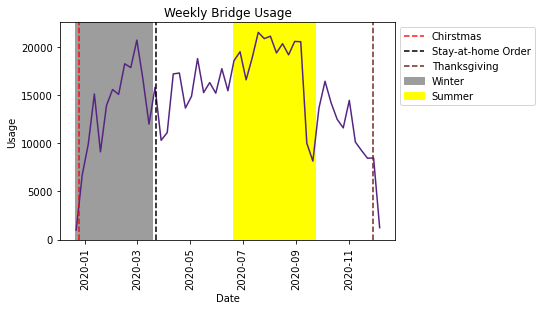

In [16]:
plt.plot(weekly_sub.index, weekly_sub['Total'], color = '#552583')
plt.axvspan(pd.to_datetime('2019-12-21'), pd.to_datetime('2020-03-19'), color = '#9d9d9d', label = 'Winter')
plt.axvspan(pd.to_datetime('2020-06-20'), pd.to_datetime('2020-09-22'), color = '#ffff00', label = 'Summer')
plt.axvline(pd.to_datetime('2019-12-25'), ls = '--', color = '#ff0000', alpha = 0.9, label = 'Chirstmas')
plt.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#000000', label = 'Stay-at-home Order')  # https://www.seattletimes.com/seattle-news/inslee-to-hold-televised-address-monday-evening-to-announce-enhanced-strategies-on-covid-19/
plt.axvline(pd.to_datetime('2020-11-28'), ls = '--', color = '#702822', label = 'Thanksgiving')
plt.title('Weekly Bridge Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()

Rolling Window:

In [17]:
daily = df.resample('D').sum()  # daily sum

roll = daily.rolling(window = 30, center = True).sum()
gauss_roll = daily.rolling(window = 30, center = True, win_type = 'gaussian').sum(std = 10)  # 30 day rolling window with 10 day Gaussian within the window

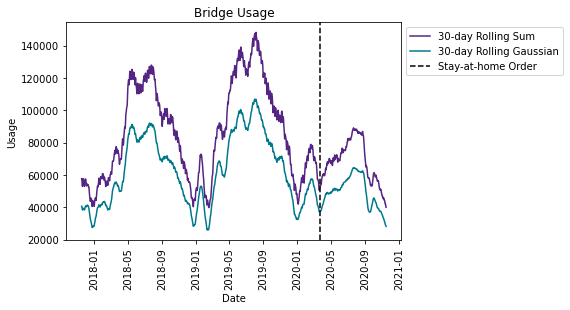

In [18]:
plt.plot(roll.index, roll['Total'], color = '#552583', label = '30-day Rolling Sum')
plt.plot(gauss_roll.index, gauss_roll['Total'], color = '#00788c', label = '30-day Rolling Gaussian')
plt.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#000000', label = 'Stay-at-home Order')  # https://www.seattletimes.com/seattle-news/inslee-to-hold-televised-address-monday-evening-to-announce-enhanced-strategies-on-covid-19/
plt.title('Bridge Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()

Time:

In [19]:
time_df = df.groupby(df.index.time).mean().reset_index()

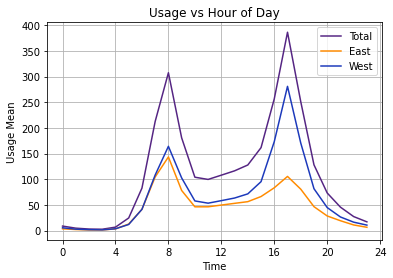

In [20]:
plt.plot(time_df.index, time_df['Total'], color = '#552583', label = 'Total')
plt.plot(time_df.index, time_df['East'], color = '#ff8b00', label = 'East')
plt.plot(time_df.index, time_df['West'], color = '#1c39bb', label = 'West')
plt.title('Usage vs Hour of Day')
plt.xlabel('Time')
plt.ylabel('Usage Mean')
plt.xticks(np.arange(7) * 4)
plt.legend()
plt.grid()
plt.show()
plt.close()

Week:

In [21]:
week_df = df.groupby(df.index.dayofweek).mean()

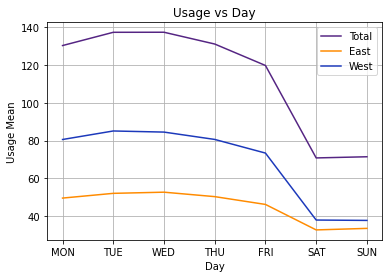

In [22]:
plt.plot(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], week_df['Total'], color = '#552583', label = 'Total')
plt.plot(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], week_df['East'], color = '#ff8b00', label = 'East')
plt.plot(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], week_df['West'], color = '#1c39bb', label = 'West')
plt.title('Usage vs Day')
plt.xlabel('Day')
plt.ylabel('Usage Mean')
plt.legend()
plt.grid()
plt.show()
plt.close()

Time and Week:

In [23]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')

time_week_df = df.groupby([weekend, df.index.time]).mean()

time_week_df = time_week_df.reset_index()

In [24]:
weekday_df = time_week_df[time_week_df['level_0'] == 'Weekday']
weekend_df = time_week_df[time_week_df['level_0'] == 'Weekend'].reset_index(drop = True)

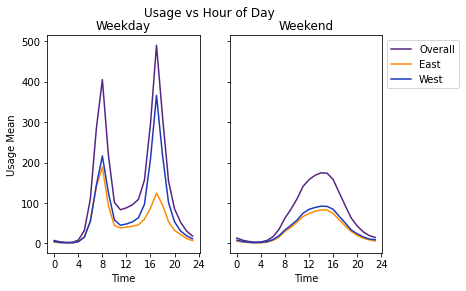

In [25]:
fig, ax = plt.subplots(1, 2, sharey = True)
fig.suptitle('Usage vs Hour of Day')

ax[0].plot(weekday_df.index, weekday_df['Total'], color = '#552583', label = 'Overall')
ax[0].plot(weekday_df.index, weekday_df['East'], color = '#ff8b00', label = 'East')
ax[0].plot(weekday_df.index, weekday_df['West'], color = '#1c39bb', label = 'West')
ax[0].set_title('Weekday')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Usage Mean')
ax[0].set_xticks(np.arange(7) * 4)

ax[1].plot(weekend_df.index, weekend_df['Total'], color = '#552583', label = 'Overall')
ax[1].plot(weekend_df.index, weekend_df['East'], color = '#ff8b00', label = 'East')
ax[1].plot(weekend_df.index, weekend_df['West'], color = '#1c39bb', label = 'West')
ax[1].set_title('Weekend')
ax[1].set_xlabel('Time')
ax[1].set_xticks(np.arange(7) * 4)

plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()